# Degenerate states tutorial and demo
03/08/21

When working with matrix elements for degenerate states, there are some additional considerations, which are explored herein. (For matrix element background, see [the advanced tutorial](ePS_adv_tutorial_080520.html).)

## Background - degenerate orbitals in ePolyScat (ePS)

For degenerate states, ePS outputs additional sets of matrix elements, identified by the index `it`. In some cases, simply working with a single set of matrix elements (i.e. selecting `it=1`) is sufficient; in other cases one needs to use all sets, or set a degeneracy variable.

Various cases are explored below.

## Setup

Load modules & test dataset.

In [1]:
# For module testing, include path to module here, otherwise use global installation
# local = True

# if local:
#     import sys
#     if sys.platform == "win32":
#         modPath = r'D:\code\github\ePSproc'  # Win test machine
#         winFlag = True
#     else:
#         modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
#         winFlag = False

#     sys.path.append(modPath)

# Base
import epsproc as ep

# Class dev code
from epsproc.classes.multiJob import ePSmultiJob
from epsproc.classes.base import ePSbase

* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
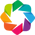

In [2]:
# Set some plot options (optional, but required for Holoviews backend)
ep.plot.hvPlotters.setPlotters()

In [3]:
# Set path for ePSproc test data, available from https://github.com/phockett/ePSproc/tree/master/data
# Here this is assumed to be on the epsproc path

from pathlib import Path
import os

epDemoDataPath = Path(ep.__path__[0]).parent/'data'

In [4]:
# Set path
dataPath = os.path.join(epDemoDataPath, 'photoionization', 'n2_multiorb')

# Instantiate class object.
# Minimally this needs just the dataPath, if verbose = 1 is set then some useful output will also be printed.
data = ePSbase(dataPath, verbose = 1)

# ScanFiles() - this will look for data files on the path provided, and read from them.
data.scanFiles()


*** Job orb6 details
Key: orb6
Dir /home/femtolab/github/ePSproc/data/photoionization/n2_multiorb, 1 file(s).
{   'batch': 'ePS n2, batch n2_1pu_0.1-50.1eV, orbital A2',
    'event': ' N2 A-state (1piu-1)',
    'orbE': -17.096913836366,
    'orbLabel': '1piu-1'}

*** Job orb5 details
Key: orb5
Dir /home/femtolab/github/ePSproc/data/photoionization/n2_multiorb, 1 file(s).
{   'batch': 'ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2',
    'event': ' N2 X-state (3sg-1)',
    'orbE': -17.341816310545997,
    'orbLabel': '3sg-1'}


## Example case - $N_2$ orb6 ($\Pi_{u}$)

From the demo data, we can look at the $\Pi_{u}$ case. For orbital visualisation, see https://www.chemtube3d.com/orbitalsnitrogen/ for instance, or plotting code below (in development!).

### Matrix elements

Firstly, let's take a look at the raw matrix elements, with some subselection for clarity.

In [5]:
k = 'orb6'
data.matEtoPD(keys = k, selDims = {'Type':'L'}, Erange = [1.0,5.0], thres=1e-2)


*** 1piu-1
Matrix element table, threshold=0.01, data type=complex128.


/home/femtolab/anaconda3/envs/epsdev-030821/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Eke                                        1.1                 2.1  \
Cont Targ Total it l m  mu                                           
DG   PU   PU    1  2 -2  1 -1.323692+2.405362j  2.059722+1.896683j   
                      2 -1 -1.323692+2.405362j  2.059722+1.896683j   
                   4 -2  1  0.034025+0.018395j  0.025330-0.054052j   
                      2 -1  0.034025+0.018395j  0.025330-0.054052j   
                2  2 -2  1 -2.405362-1.323692j -1.896683+2.059722j   
                      2 -1  2.405362+1.323692j  1.896683-2.059722j   
                   4 -2  1 -0.018395+0.034025j  0.054052+0.025330j   
                      2 -1  0.018395-0.034025j -0.054052-0.025330j   
PG   PU   SU    1  2 -1  0 -1.565351-4.060912j -3.956866+1.117559j   
                      1  0 -1.565351-4.060912j -3.956866+1.117559j   
                   4 -1  0 -0.072045+0.015315j  0.038145+0.092675j   
                      1  0 -0.072045+0.015315j  0.038145+0.092675j   
                2  2 -1  0  4.060912-1.565351j -1.117559-3.956866j   
                      1  0 -4.060912+1.565351j  1.117559+3.956866j   
                   4 -1  0 -0.015315-0.072045j -0.092675+0.038145j   
                      1  0  0.015315+0.072045j  0.092675-0.038145j   
SG   PU   PU    1  0  0 -1 -1.192084+0.664368j  0.025137+1.273682j   
                         1 -1.192084+0.664368j  0.025137+1.273682j   
                   2  0 -1  0.102868+1.101282j  1.064970+0.166844j   
                         1  0.102868+1.101282j  1.064970+0.166844j   
                   4  0 -1  0.022030+0.005773j  0.006465-0.033890j   
                         1  0.022030+0.005773j  0.006465-0.033890j   
                2  0  0 -1 -0.664368-1.192084j -1.273682+0.025137j   
                         1  0.664368+1.192084j  1.273682-0.025137j   
                   2  0 -1 -1.101282+0.102868j -0.166844+1.064970j   
                         1  1.101282-0.102868j  0.166844-1.064970j   
                   4  0 -1 -0.005773+0.022030j  0.033890+0.006465j   
                         1  0.005773-0.022030j -0.033890-0.006465j   

Eke                                        3.1                 4.1  
Cont Targ Total it l m  mu                                          
DG   PU   PU    1  2 -2  1  2.776525+0.528391j  2.804544-0.376417j  
                      2 -1  2.776525+0.528391j  2.804544-0.376417j  
                   4 -2  1 -0.023705-0.076824j -0.068247-0.073785j  
                      2 -1 -0.023705-0.076824j -0.068247-0.073785j  
                2  2 -2  1 -0.528391+2.776525j  0.376417+2.804544j  
                      2 -1  0.528391-2.776525j -0.376417-2.804544j  
                   4 -2  1  0.076824-0.023705j  0.073785-0.068247j  
                      2 -1 -0.076824+0.023705j -0.073785+0.068247j  
PG   PU   SU    1  2 -1  0 -2.146107+3.074793j -0.603062+3.285834j  
                      1  0 -2.146107+3.074793j -0.603062+3.285834j  
                   4 -1  0  0.108176+0.039526j  0.119749-0.018265j  
                      1  0  0.108176+0.039526j  0.119749-0.018265j  
                2  2 -1  0 -3.074793-2.146107j -3.285834-0.603062j  
                      1  0  3.074793+2.146107j  3.285834+0.603062j  
                   4 -1  0 -0.039526+0.108176j  0.018265+0.119749j  
                      1  0  0.039526-0.108176j -0.018265-0.119749j  
SG   PU   PU    1  0  0 -1  0.468161+1.094660j  0.621346+0.924361j  
                         1  0.468161+1.094660j  0.621346+0.924361j  
                   2  0 -1  0.966290-0.395279j  0.774437-0.643798j  
                         1  0.966290-0.395279j  0.774437-0.643798j  
                   4  0 -1 -0.023399-0.038924j -0.046039-0.031340j  
                         1 -0.023399-0.038924j -0.046039-0.031340j  
                2  0  0 -1 -1.094660+0.468161j -0.924361+0.621346j  
                         1  1.094660-0.468161j  0.924361-0.621346j  
                   2  0 -1  0.395279+0.966290j  0.643798+0.774437j  
                         1 -0.395279

Note here that there are entries for `it=1,2` in the table. For example, the first line has 

```
it 	l 	m 	mu 	
1 	2 	-2 	1 	-1.323692+2.405362j 	2.059722+1.896683j ...
```

And for `it=2` the components are:

```
it 	l 	m 	mu 	
2 	2 	-2 	1 	-2.405362-1.323692j 	-1.896683+2.059722j ...
```

In this case, we can see:

- Two `it` components, hence doubly-degenerate ($\Pi$) state.
- In complex form, the components have switched real and imaginary parts, and a sign change, $a_{1} = b_{2}$ and $b_{2} = -a_{1}$ (where the components are given as $it_{1} = a_{1} + b_{1}j$). This can more concisely be given as $z_{2} = iz_{1}$.
- In magnitude-phase form, this relationship is a phase rotation, in this case $\phi_{1} = \phi_{2} + 3/2\pi$.

This is easy to confirm numerically:

In [7]:
# Quick numerical check for specific values
import numpy as np

test = np.array([-1.323692+2.405362j, -2.405362-1.323692j])

print(f"Input: \t{test}")
print(f"*i: \t{test*1j}")
print(f"Abs: \t{np.abs(test)}")
print(f"Phase: \t{np.angle(test)}")
print(f"Phase shifted: \t{np.angle(test) - 3/2 *np.pi}")


Input: 	[-1.323692+2.405362j -2.405362-1.323692j]
*i: 	[-2.405362-1.323692j  1.323692-2.405362j]
Abs: 	[2.74552852 2.74552852]
Phase: 	[ 2.07387663 -2.63851235]
Phase shifted: 	[-2.63851235 -7.35090133]


In [64]:
test[1] == 1j*test[0]

True

In [10]:
# Check inverse
test[0] == test[1]/1j

True

In this case, the two components correspond to the two $\Pi$ orbital components, which are (by convention) aligned along the $x$ and $y$ axes, hence are a similarly phase-related pair of functions. (See, for instance, [the frame rotations demo](../tests/ePSproc_frame_rotation_tests_Dec2019.html) for a similar effect with more details.) Note that the details of the relationship here is, essentially, the same as the case for symmetrized harmonics, so will generally depend on the point group of the system.

For using matrix elements in general, this has a few implications:

1. Choosing a specific component of a degenerate set corresponds to a specific axis choice in the molecular and/or aligned and/or lab frames of reference (MF, AF and LF respectively). 
2. The exact choice of axis implied may depend on the formalism used, and which phase-rotations are included.
3. Including all degenerate components may introduce phase issue, or not - again depending on the formalism.
4. In cases where all components should be included, but are treated without additional phase relations/rotations, it is usually the case that only a single set of parameters (value of `it`) should be used, but a degeneracy factor should be included.

In the rest of the notebook we'll look at some specific examples.

### MF terms

In [24]:
# Compute MFPADs with default parameters...
data.mfpadNumeric(keys = k)

In [31]:
# Note this selects it=1 by default
data.data[k]['TX'].coords

Coordinates:
    it       int64 1
    Ehv      (Eke) float64 17.2 18.2 19.2 20.2 21.2 ... 63.2 64.2 65.2 66.2 67.2
    Type     <U1 'L'
    SF       (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)
  * Sym      (Sym) MultiIndex
  - Cont     (Sym) object 'SG' 'DG' 'PG'
  - Targ     (Sym) object 'PU' 'PU' 'PU'
  - Total    (Sym) object 'PU' 'PU' 'SU'
  * Phi      (Phi) float64 0.0 0.1282 0.2565 0.3847 ... 5.899 6.027 6.155 6.283
  * Theta    (Theta) float64 0.0 0.06411 0.1282 0.1923 ... 3.013 3.077 3.142
  * Eke      (Eke) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 46.1 47.1 48.1 49.1 50.1
  * Euler    (Euler) MultiIndex
  - P        (Euler) float64 0.0 0.0 1.571
  - T        (Euler) float64 0.0 1.571 1.571
  - C        (Euler) float64 0.0 0.0 0.0
    Labels   (Euler) <U18 'z' 'x' 'y'

Summing over dims: {'Sym'}
Sph plots: Eke: 1.1, plotType: a
Plotting with mpl
Data dims: ('Labels', 'Phi', 'Theta'), subplots on Labels


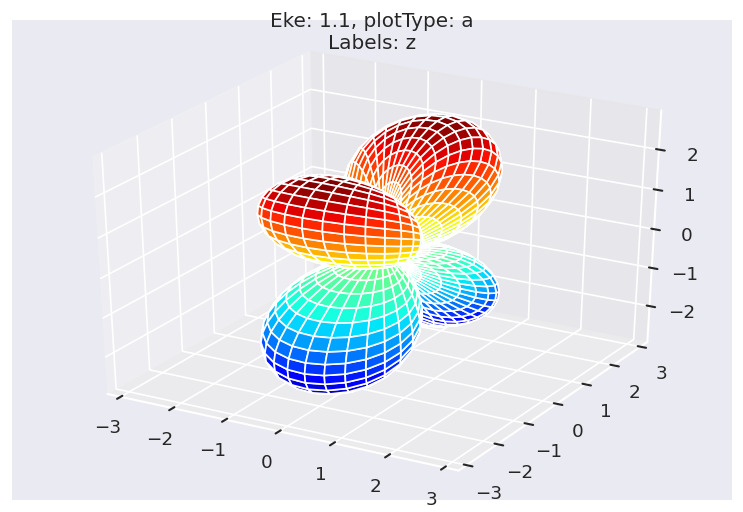

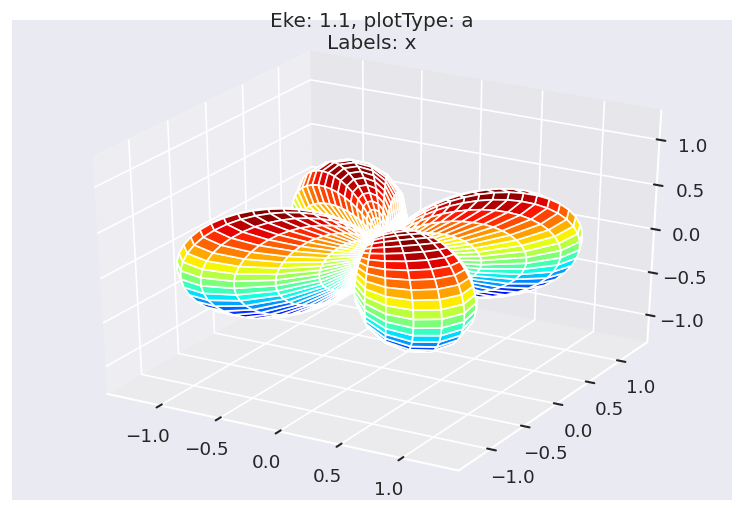

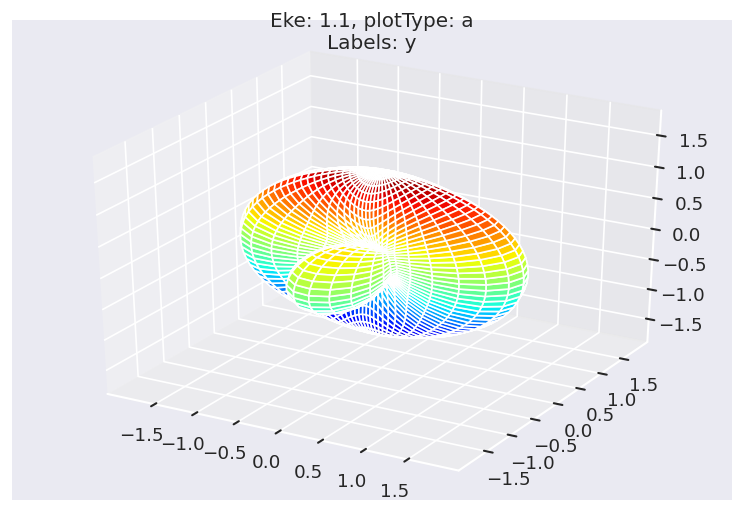

In [29]:
data.padPlot(keys = k, selDims={'Eke':[1.1]})  #, Erange = [5, 10, 4])

Note here that the $x$ and $y$ components are different. This is correct *if* we only wanted to use a single orbital component. On the other hand, if we want the summed/symmetrized results then - for a cylindically symmetric system - we'd expect a cyllindrically symmetric result.

If we set `it=2`, we get results corresponding to the other (rotated) orbital component:

Summing over dims: {'Sym'}
Sph plots: Eke: 1.1, plotType: a
Plotting with mpl
Data dims: ('Labels', 'Phi', 'Theta'), subplots on Labels


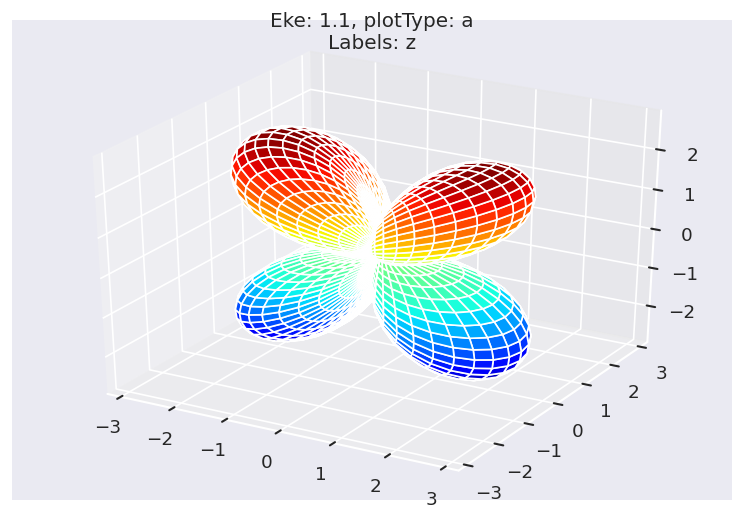

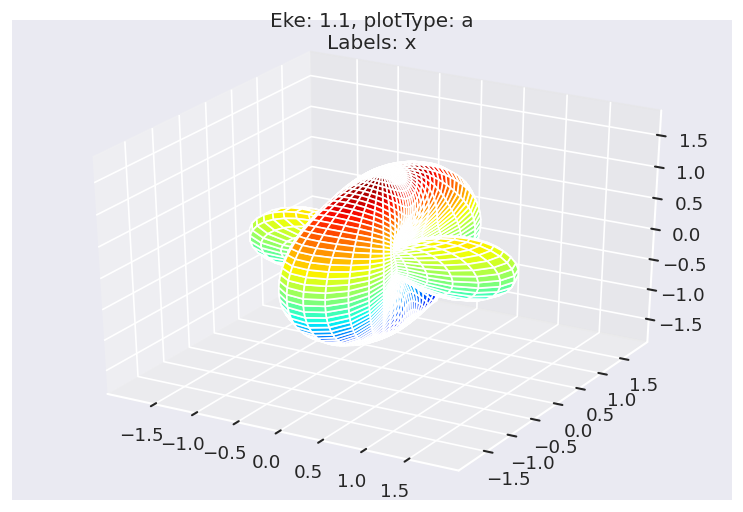

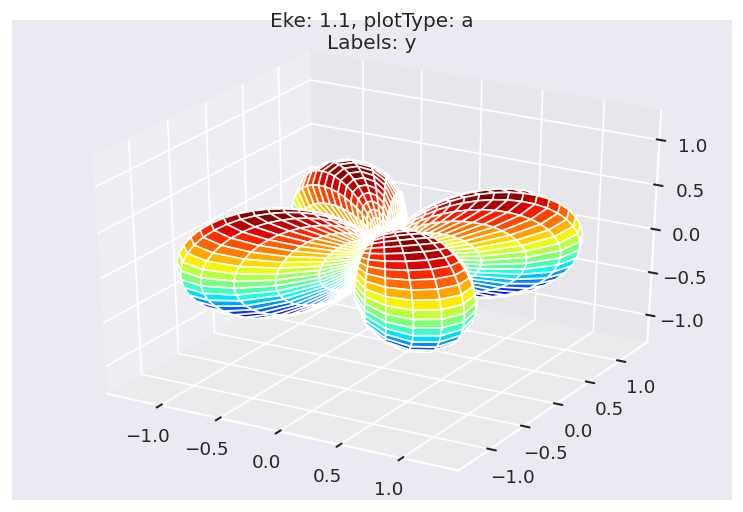

In [34]:
data.mfpadNumeric(keys = k, inds = {'Type':'L', 'it':2})
data.padPlot(keys = k, selDims={'Eke':[1.1]}) 

We can also sum over these directly...

Summing over dims: {'it', 'Sym'}
Sph plots: Eke: 1.1, plotType: a
Plotting with mpl
Data dims: ('Labels', 'Phi', 'Theta'), subplots on Labels


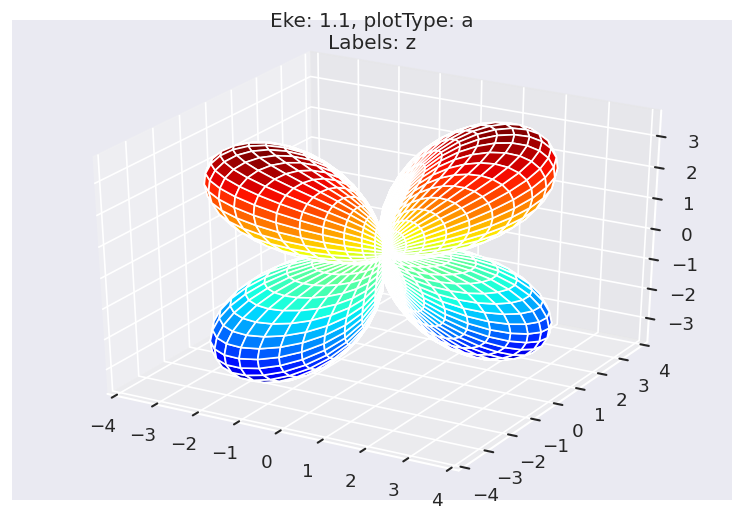

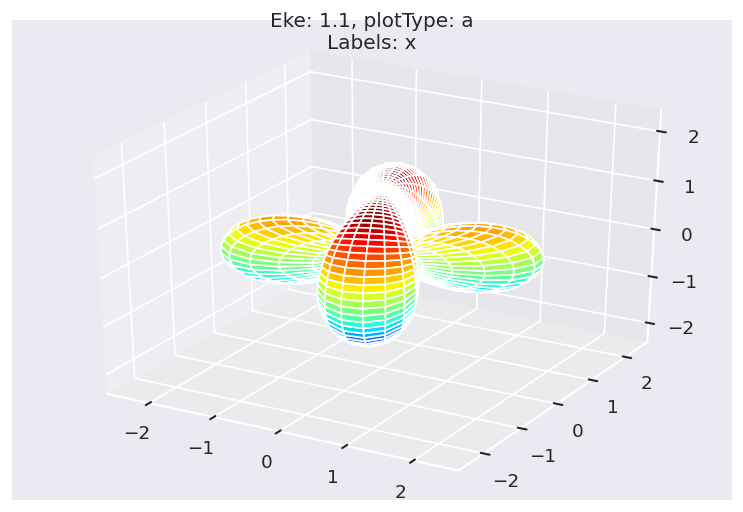

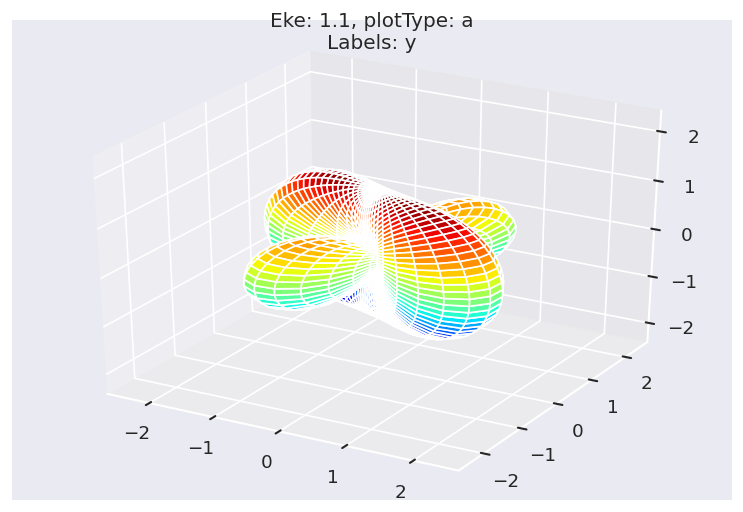

In [35]:
# Include it=1,2 components & sum
data.mfpadNumeric(keys = k, inds = {'Type':'L'})
data.padPlot(keys = k, selDims={'Eke':[1.1]}) 

This is almost correct... but there is still some extra phase-rotation present... This is clear in the imaginary values...

Summing over dims: {'it', 'Sym'}
Sph plots: Eke: 1.1, plotType: i
Plotting with mpl
Data dims: ('Labels', 'Phi', 'Theta'), subplots on Labels


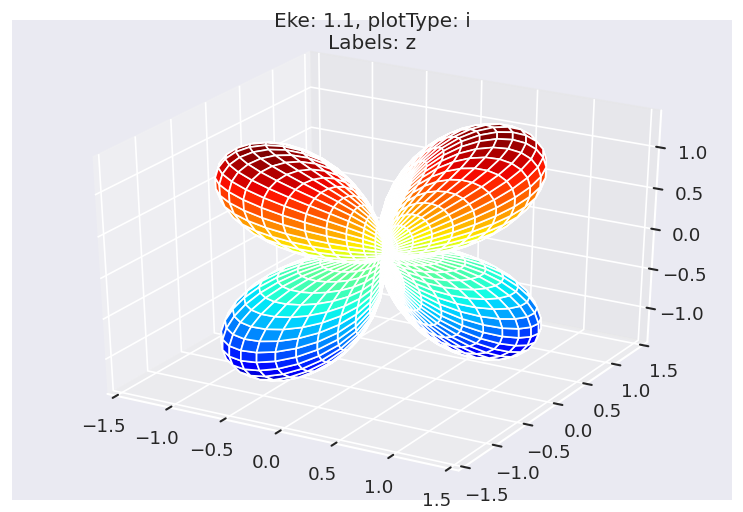

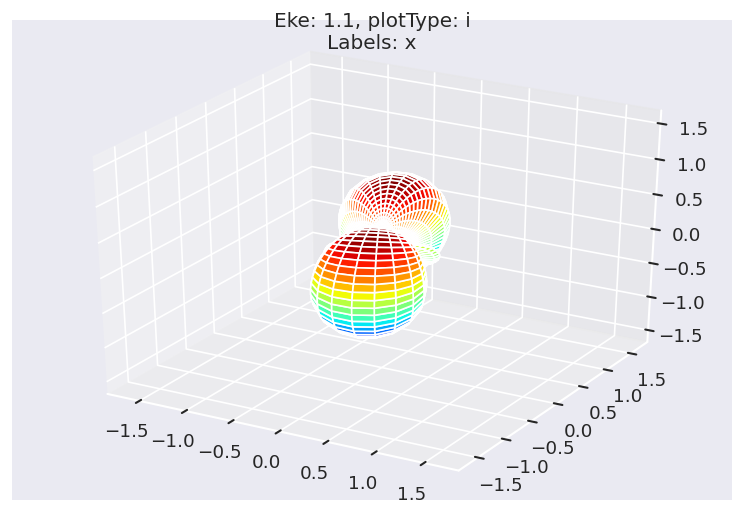

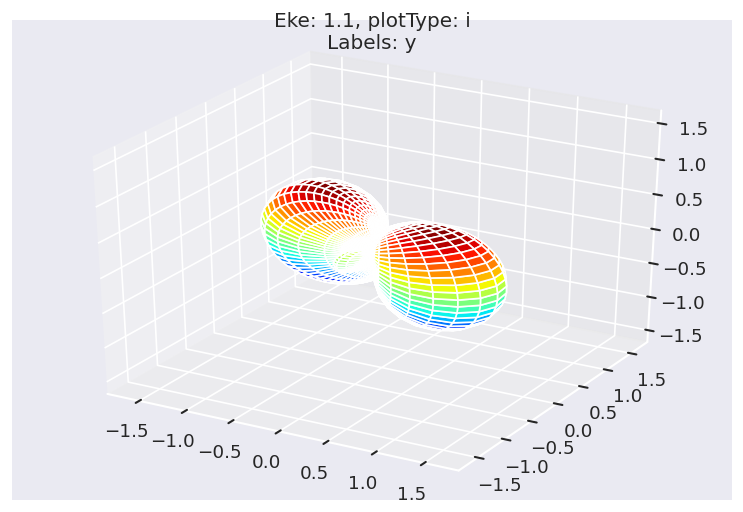

In [39]:
data.padPlot(keys = k, selDims={'Eke':[1.1]}, pType = 'i') 

### Unaligned (isotropic) AF/LF case

#### Default case - single `it` component

Firstly, let's check the isotropic case with the default settings.

(For more on the ePS `GetCro` outputs used for reference here, see [the ePS tutorial](ePS_tutorial_080520.html#Results).)

In [68]:
# Compute AF-BLMs with default parameters (==LF case with isotropic axis distribution)
data.AFBLM(keys = k)


Calculating AF-BLMs for job key: orb6


All-NaN slice encountered
All-NaN slice encountered



Calculating AF-BLMs for job key: orb5


All-NaN slice encountered
All-NaN slice encountered


In [85]:
# Note the default cases selects it=1 only!
# In particular, the code has defaults selDims = {'Type':'L', 'it':1}
data.data[k]['AFBLM'].coords

Coordinates:
    Euler       (Labels) object (0.0, 0.0, 0.0)
  * Labels      (Labels) <U1 'A'
  * t           (t) int64 0
    Ehv         (Eke) float64 17.2 18.2 19.2 20.2 21.2 ... 64.2 65.2 66.2 67.2
    it          int64 1
  * Eke         (Eke) float64 0.1 1.1 2.1 3.1 4.1 ... 46.1 47.1 48.1 49.1 50.1
    Type        <U1 'L'
    SF          (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)
    XSraw       (Labels, t, Eke) complex128 (5.619190421366347+0j) ... (0.23596459084213936+0j)
    XSrescaled  (Labels, t, Eke) complex128 (19.91951140264434+0j) ... (0.8364726954309887+0j)
    XSiso       (Eke) complex128 (19.919511415560077+0j) ... (0.8379214361922648+0j)
  * BLM         (BLM) MultiIndex
  - l           (BLM) int64 0 2
  - m           (BLM) int64 0 0

Dataset: orb6, 1piu-1, AFBLM


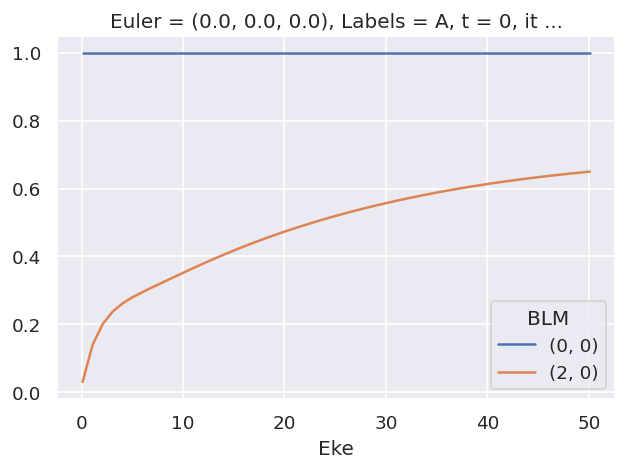

In [86]:
# Plot AFBLM outputs
data.BLMplot(keys = k, col=[])  # TODO - update defaults from None to []!

Dataset: orb6, 1piu-1, AFBLM


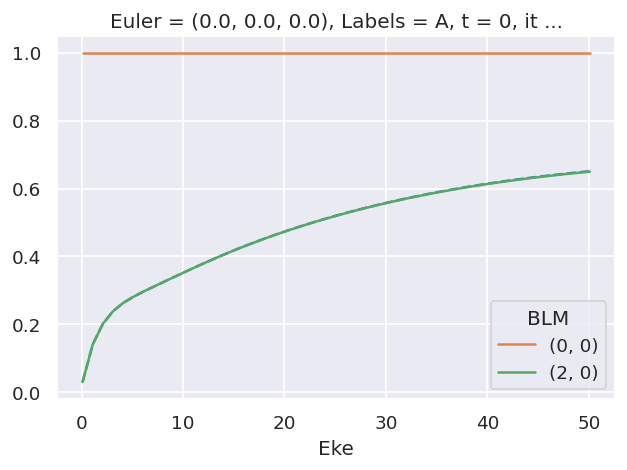

In [87]:
# For reference, add the orignial ePolyScat GetCro outputs, which also give the LF betas
# (Note conversion to spherical harmonic form)
data.data[k]['XSconv'] = ep.conversion.conv_BL_BLM(data.data[k]['XS'], to='sph')
data.data[k]['XSconv'].sel({'Type':'L', 'XC':'BETA', 'Sym':'All'}).plot.line(x='Eke', linestyle='dashed');

# Plot AFBLM outputs
data.BLMplot(keys = k, col=[])  # TODO - update defaults from None to []!



OK, this looks good for $\beta_2$ values. Note, however, that there are a few things going on behind the scenes, in particular the routine selects `it=1` by default, and also normalises by the $\beta_0$ values - this can hide some issues.

Let's take a closer look at the output values for the XS (cross-section).

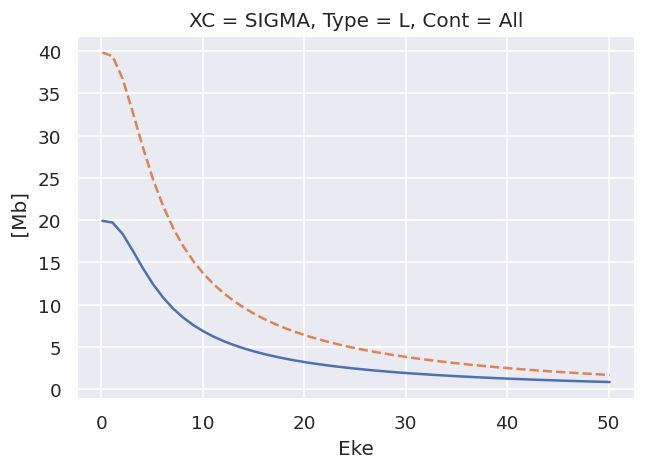

In [101]:
# Check absolute cross-sections
data.data[k]['AFBLM']['XSrescaled'].real.plot()
data.data[k]['XSconv'].sel({'Type':'L', 'XC':'SIGMA', 'Sym':'All'}).real.plot(linestyle='dashed');

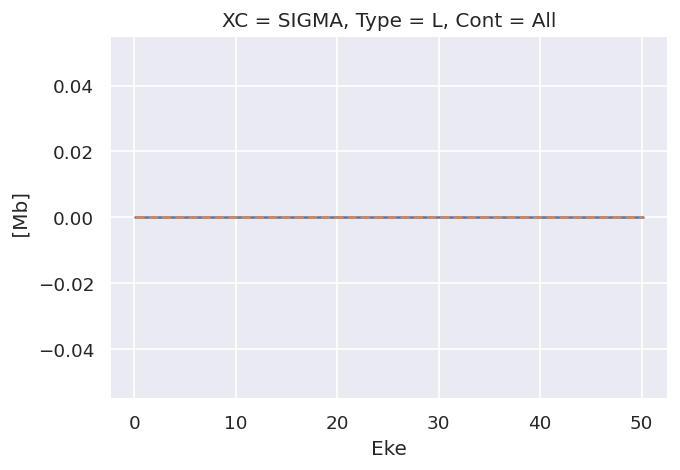

In [102]:
# Check absolute cross-sections, imag values
data.data[k]['AFBLM']['XSrescaled'].imag.plot()
data.data[k]['XSconv'].sel({'Type':'L', 'XC':'SIGMA', 'Sym':'All'}).imag.plot(linestyle='dashed');

Here we see that: 

- There is a factor of 2 discrepancy in the absoluted XS, which is due to the missing degeneracy factor.
- Imaginary values are zero, as they should be for this observable.

#### Switching `it` component

Next, let's look at the results if we decide to set `it=2`.

In [104]:
# Compute AF-BLMs with default parameters (==LF case with isotropic axis distribution)
data.AFBLM(keys = k, selDims = {'Type':'L', 'it':2})


Calculating AF-BLMs for job key: orb6


All-NaN slice encountered
All-NaN slice encountered


In [105]:
# Check coords in output
data.data[k]['AFBLM'].coords

Coordinates:
    Euler       (Labels) object (0.0, 0.0, 0.0)
  * Labels      (Labels) <U1 'A'
  * t           (t) int64 0
    Ehv         (Eke) float64 17.2 18.2 19.2 20.2 21.2 ... 64.2 65.2 66.2 67.2
    it          int64 2
  * Eke         (Eke) float64 0.1 1.1 2.1 3.1 4.1 ... 46.1 47.1 48.1 49.1 50.1
    Type        <U1 'L'
    SF          (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)
    XSraw       (Labels, t, Eke) complex128 (-5.619190421366347+0j) ... (-0.23596459084213936+0j)
    XSrescaled  (Labels, t, Eke) complex128 (-19.91951140264434+0j) ... (-0.8364726954309887+0j)
    XSiso       (Eke) complex128 (19.919511415560077+0j) ... (0.8379214361922648+0j)
  * BLM         (BLM) MultiIndex
  - l           (BLM) int64 0 2
  - m           (BLM) int64 0 0

Dataset: orb6, 1piu-1, AFBLM


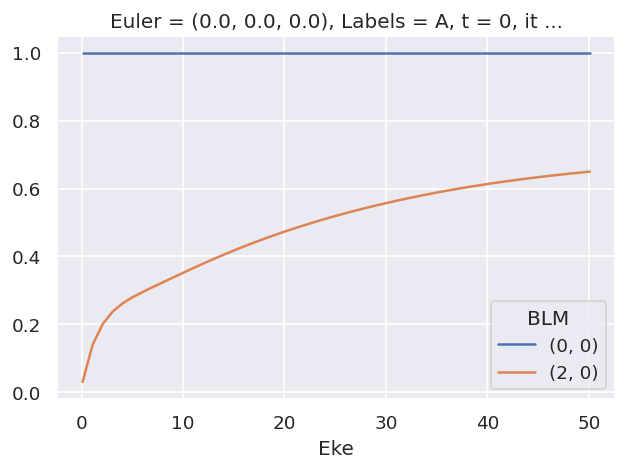

In [106]:
# Plot AFBLM outputs
data.BLMplot(keys = k, col=[])  # TODO - update defaults from None to []!

Normalised values look good... what about the absolute XS?

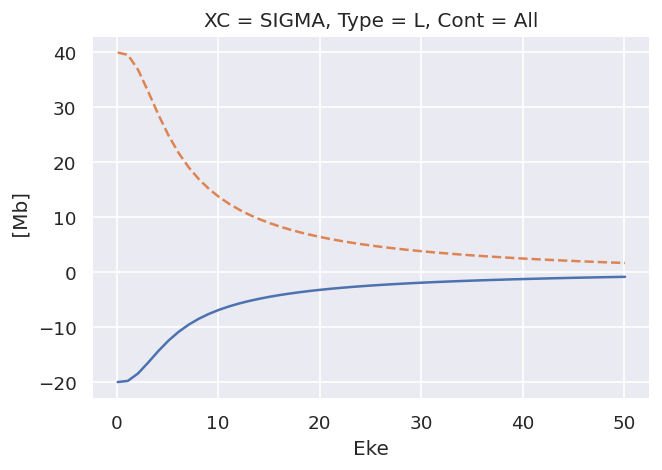

In [107]:
# Check absolute cross-sections
data.data[k]['AFBLM']['XSrescaled'].real.plot()
data.data[k]['XSconv'].sel({'Type':'L', 'XC':'SIGMA', 'Sym':'All'}).real.plot(linestyle='dashed');

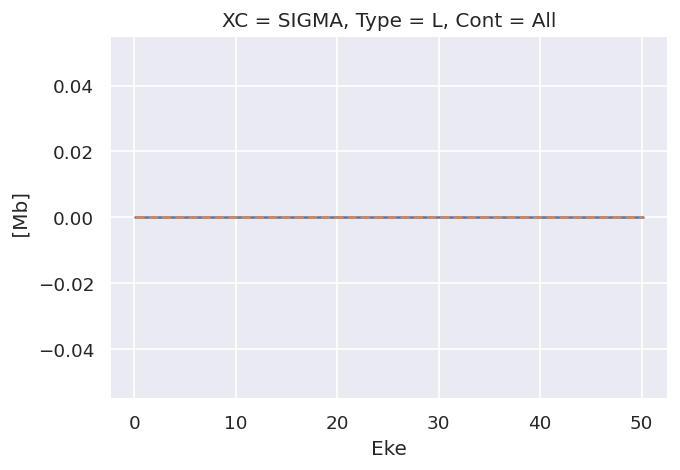

In [108]:
# Check absolute cross-sections, imag values
data.data[k]['AFBLM']['XSrescaled'].imag.plot()
data.data[k]['XSconv'].sel({'Type':'L', 'XC':'SIGMA', 'Sym':'All'}).imag.plot(linestyle='dashed');

Hmmm, here we see:

- Negative XS! Definitely not correct.
- Imaginary values are zero, OK.

Why is this? In this case, the formalism has a specific axis definition, but we've introduced an additional phase rotation with the `it=2` component which is not accounted for in the standard treatment.

#### Sum over `it` components

Summing over the components will, similarly, introduce some odd artefacts, again due to the extra phase convention here.

To test this, let's try (a) computing $\beta$ for both components then summing; (b) including the summation directly in the calculation routine (to ensure phase consistency).

In [109]:
# Compute AF-BLMs with default parameters (==LF case with isotropic axis distribution)
data.AFBLM(keys = k, selDims = {'Type':'L'})


Calculating AF-BLMs for job key: orb6


All-NaN slice encountered
All-NaN slice encountered


In [110]:
# Check coords in output
data.data[k]['AFBLM'].coords

Coordinates:
    Euler       (Labels) object (0.0, 0.0, 0.0)
  * Labels      (Labels) <U1 'A'
  * t           (t) int64 0
    Ehv         (Eke) float64 17.2 18.2 19.2 20.2 21.2 ... 64.2 65.2 66.2 67.2
  * it          (it) int64 1 2
  * Eke         (Eke) float64 0.1 1.1 2.1 3.1 4.1 ... 46.1 47.1 48.1 49.1 50.1
    Type        <U1 'L'
    SF          (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)
    XSraw       (Labels, t, Eke, it) complex128 (5.619190421366347+0j) ... (-0.23596459084213936+0j)
    XSrescaled  (Labels, t, Eke, it) complex128 (19.91951140264434+0j) ... (-0.8364726954309887+0j)
    XSiso       (Eke, it) complex128 (19.919511415560073+0j) ... (0.8379214361922649+0j)
  * BLM         (BLM) MultiIndex
  - l           (BLM) int64 0 2
  - m           (BLM) int64 0 0

Dataset: orb6, 1piu-1, AFBLM


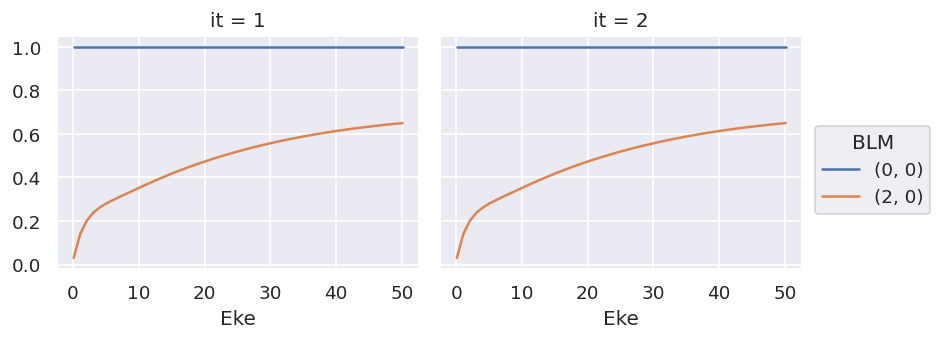

In [111]:
# Plot AFBLM outputs
# As before, this looks OK intially...
data.BLMplot(keys = k, col='it')  # TODO - update defaults from None to []!

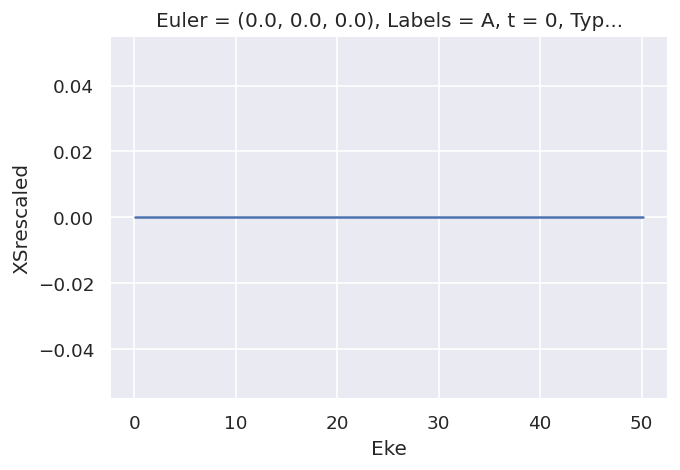

In [115]:
data.data[k]['AFBLM']['XSrescaled'].sum('it').real.plot();

As is obvious from previous discussion, this case results in a cancellation of the XS, although the $\beta_2$ values are again OK.

In [118]:
# Compute AF-BLMs with default parameters (==LF case with isotropic axis distribution)
data.AFBLM(keys = k, selDims = {'Type':'L'}, sumDims = ['mu', 'mup', 'l', 'lp', 'm', 'mp', 'S-Rp', 'it'])  #, thres = None)


Calculating AF-BLMs for job key: orb6


All-NaN slice encountered
All-NaN slice encountered


KeyError: 3

Hmmm... this doesn't look good!  What's actually happening is that the `it` components are cancelling out in summation, resulting in a cascade of errors.

However, if we correct the phase of the `it=2` component, then it can be included directly...

In [11]:
# Set test matrix elements
kc = 'corrected'
data.data[kc] = data.data[k].copy()

data.data[kc]['matE'] = data.data[kc]['matE'].

In [23]:
# data.data[kc]['matE']['it'].where(data.data[kc]['matE']['it']==1, 1/1j)
# phaseCorr = (data.data[kc]['matE']['it'] == 2)/1j

# Set additional phase term
phaseCorr = data.data[kc]['matE']['it'].copy()
phaseCorr = phaseCorr.where(phaseCorr.it == 1, 1/1j)
phaseCorr

<xarray.DataArray 'it' (it: 2)>
array([1.+0.j, 0.-1.j])
Coordinates:
  * it       (it) int64 1 2

In [ ]:
# Multiply by phase term & calculate AF

data.data[kc]['matE'] = data.data[kc]['matE'] * phaseCorr
data.AFBLM(keys = kc, selDims = {'Type':'L'}, sumDims = ['mu', 'mup', 'l', 'lp', 'm', 'mp', 'S-Rp', 'it'])

#### AF case summary

The general conclusion here is that the normalised $\beta$ values are correct when a single `it` component is selected, but that an additional degeneracy factor, and possibly phase, is required to get the correct absolute XS.

TODO: add this to AF calculation defaults!

### Orbital plots

Currently not working for demo case - looks like basis set issue?

In [11]:
from epsproc.vol import orbPlot

chemPath = r'/home/femtolab/python/chem/tools/chemlab/chemlab'  # Linux dev machine
# chemPath = r'D:\temp\chemlab\chemlab'  # Win dev machine
# out = orbPlot.importChemLabQC(chemPath = chemPath)

# Test class
# filename = r"/home/femtolab/ePS/XeF2/electronic_structure/xef2_SPKrATZP_rel_geom.log"  # XeF2 Gamess file  OK
# filename = r"D:\projects\ePolyScat\xef2\electronic_structure\xef2_SPKrATZP_rel_geom.log"

mo = orbPlot.molOrbPlotter(chemPath = chemPath, fileIn = os.path.join(dataPath, 'n2_cc-pVQZ_geom.log'))



Import OK: Chemlab module <module 'qc.wavefunction' from '/home/femtolab/python/chem/tools/chemlab/chemlab/qc/wavefunction.py'>
Found electronic structure file: /home/femtolab/github/ePSproc/data/photoionization/n2_multiorb/n2_cc-pVQZ_geom.log
Read 2 atoms and 160 MOs
*** Grids set OK
StructuredGrid (0x7f60963a8360)
  N Cells:	117649
  N Points:	125000
  X Bounds:	-1.533e+00, 1.533e+00
  Y Bounds:	-1.533e+00, 1.533e+00
  Z Bounds:	-1.533e+00, 1.533e+00
  Dimensions:	50, 50, 50
  N Arrays:	0



In [13]:
mo.data.homos

array([6], dtype=int32)

In [14]:
# Set orbs to plot - currently handles list of strs only!
# orbs = [5,6]
# orbList = [str(item) for item in orbs]
# [mo.calcOrb(orbN = orbN) for orbN in orbs];

mo.calcOrb()

KeyError: 'G'